In [3]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf

a = tf.constant(2)
b = tf.constant(3)

c = tf.add(a, b)

print(c)

tf.Tensor(5, shape=(), dtype=int32)


In [5]:
print(tf.__version__)

2.14.0


# PART - 1 (DATASET   SETTING)

### Importing basic libraries : 

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Dividing the dataset into dependent and independent 

In [5]:
X= dataset.iloc[:,3:13]
Y= dataset.iloc[:,13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

#### Feature engineering

In [8]:
geography=pd.get_dummies(X['Geography'],drop_first=True)

gender = pd.get_dummies(X['Gender'],drop_first=True)

#### Concatenation

In [9]:
X=X.drop(['Geography','Gender'],axis=1)

In [10]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [11]:
X=pd.concat([X,geography,gender],axis=1)

In [12]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


#### Splitting the dataset into train_test_split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [15]:
x_train.shape

(8000, 11)

In [16]:
y_train.shape

(8000,)

In [17]:
x_test.shape

(2000, 11)

In [18]:
y_test.shape

(2000,)

#### Feature Scaling:

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [21]:
x_train.shape

(8000, 11)

In [24]:
x_test.shape

(2000, 11)

# PART-2 CREATING ARTIFICIAL NUERAL NETWORK (ANN)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU

In [26]:
classifier=Sequential()

In [27]:
#adding input layer -1 :
classifier.add(Dense(units=11,input_shape=(11,),activation='relu'))
#adding hidden layer 1:


In [28]:
classifier.add(Dense(units=7,activation='relu'))
#adding hidden layer 2:
classifier.add(Dense(units=6,activation='relu'))
#adding outputlayer :
classifier.add(Dense(1,activation='sigmoid'))


In [43]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
early_stopping=tf.keras.callbacks.EarlyStopping(
monitor="val_loss",
min_delta=0.0001,
patience=20,
mode="auto",
baseline=None,
restore_best_weights=False)

In [47]:

model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4453 - accuracy: 0.7994 - val_loss: 0.4532 - val_accuracy: 0.7982
Epoch 2/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4233 - accuracy: 0.8102 - val_loss: 0.4339 - val_accuracy: 0.8080
Epoch 3/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4095 - accuracy: 0.8192 - val_loss: 0.4226 - val_accuracy: 0.8107
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3959 - accuracy: 0.8259 - val_loss: 0.4083 - val_accuracy: 0.8243
Epoch 5/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3805 - accuracy: 0.8421 - val_loss: 0.3934 - val_accuracy: 0.8368
Epoch 6/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3650 - accuracy: 0.8503 - val_loss: 0.3835 - val_accuracy: 0.8387
Epoch 7/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3539 - accuracy: 0.8541 - val_loss: 0.3749 - val_accuracy:

In [49]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Summarize the history of accuracy: 

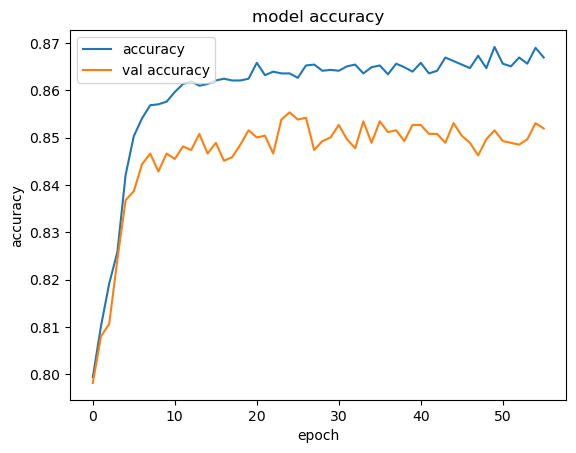

In [50]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history["val_accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy','val accuracy'],loc='upper left')
plt.show()


# Summarize the loss:


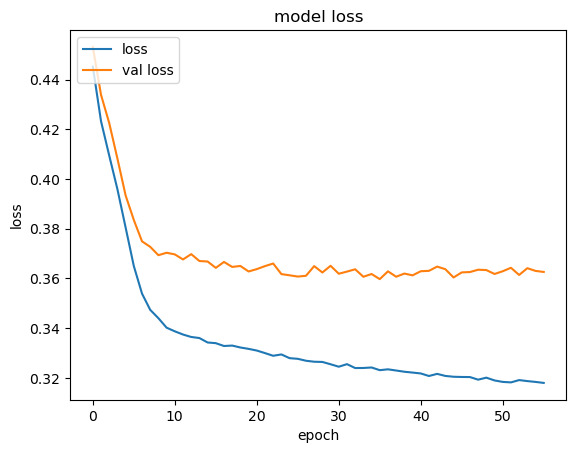

In [51]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val loss'],loc='upper left')
plt.show()

### Predicting  x test :

In [63]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred>=0.5)
y_pred

63/63 [==============================] - 0s 4ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [64]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [65]:
cm

array([[1481,  114],
       [ 187,  218]], dtype=int64)

### Caluclating the accuracy :

In [66]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [67]:
score

0.8495

In [69]:
classifier.get_weights

<bound method Model.get_weights of <keras.src.engine.sequential.Sequential object at 0x000001922D5DFC10>>